In [17]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [16]:
d = pd.read_excel("DataLSTM_levels.xlsx")
d.dropna()
EDA_max= []
EDA_min = []
EDA_maxmin = pd.DataFrame()
for add in range(2,36):
    x = d[d['Participant']==add]
    x.reset_index(inplace=True, drop=False)
    EDA_max.append(max(x['EDA']))
    EDA_min.append(min(x['EDA']))

EDA_maxmin['EDA_max']=EDA_max
EDA_maxmin['EDA_min']=EDA_min
EDA_maxmin


,EDA_max,EDA_min
0,0.770650,0.191197
1,0.824901,0.262315
2,2.919487,0.704769
3,5.478718,2.591620
4,0.308715,0.182494
5,5.023233,1.485105
6,0.172403,0.111262
7,2.282087,0.800228
8,10.485800,0.210243
9,0.593050,0.209528


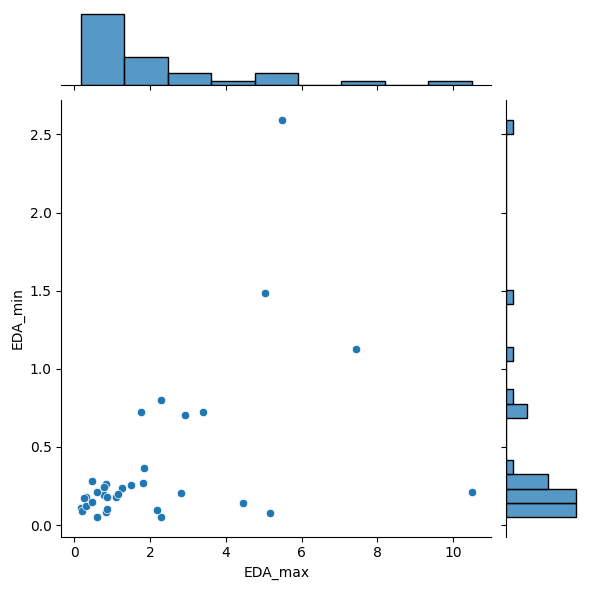

In [18]:
sb.jointplot(data=EDA_maxmin, x="EDA_max", y="EDA_min")

From the previous image we can appreciate there is a way to group our participants data base on EDA range. From image we can appreciate that we have around 4 representative groups. That job is done using Excel. As a result we extract 5 GROUPS, where just 4 have a good amount of participants. 
GROUP1 = [2,3,11,13,19,22,27,34], then GROUP2 = [4,9,18,30,33], then GROUP3 = [6,8,23,24,31,32], then GROUP4 = [14,15,16,17,21,28,29,35], then GROUP5 = [10,12,25]

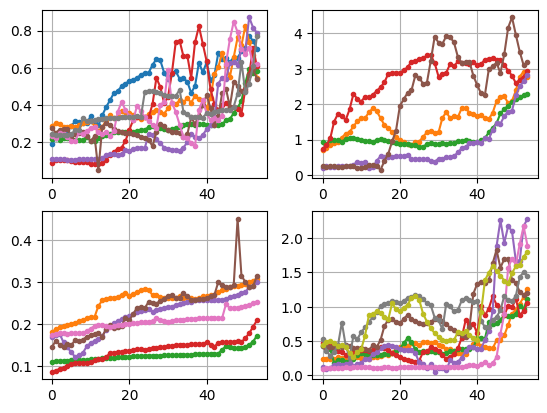

In [31]:
g1 = pd.read_excel("DataLSTM_levelsORG.xlsx", sheet_name='0.22-0.62')
g2 = pd.read_excel("DataLSTM_levelsORG.xlsx", sheet_name='0.7-3.19')
g3 = pd.read_excel("DataLSTM_levelsORG.xlsx", sheet_name='0.087-0.388')
g4 = pd.read_excel("DataLSTM_levelsORG.xlsx", sheet_name='0.36-1.8')
g5 = pd.read_excel("DataLSTM_levelsORG.xlsx", sheet_name='0.07-10.23')

fig, axs = plt.subplots(2, 2)

axs[0,0].plot(g1,'.-')
axs[0,0].grid('True')
    
axs[0,1].plot(g2,'.-')
axs[0,1].grid('True')
    
axs[1,0].plot(g3,'.-')
axs[1,0].grid('True')

axs[1,1].plot(g4,'.-')
axs[1,1].grid('True')

In [32]:
df1 = pd.read_excel("DataLSTM_levels.xlsx")
df1.dropna()
df1.head()

,Unnamed: 0,Participant,HR,EDA,Temp,Label,stress
0,5.0,2.0,72.987667,0.191197,35.878667,0.0,0.0
1,6.0,2.0,83.833000,0.222997,35.955333,0.0,0.0
2,7.0,2.0,87.537000,0.247216,36.054667,0.0,0.0
3,8.0,2.0,84.711667,0.262016,36.133000,0.0,0.0
4,9.0,2.0,92.909333,0.265123,36.176000,0.0,0.0


In [33]:
GROUP1 = [2,3,11,13,19,22,27,34]
GROUP2 = [4,9,18,30,33]
GROUP3 = [6,8,23,24,31,32]
GROUP4 = [14,15,16,17,21,28,29,35]
GROUP5 = [10,12,25]

In [34]:
df = df1[df1['Participant']==GROUP1[0]]
for a in range(1, len(GROUP1)):
  z = df1[df1['Participant']==GROUP1[a]]
  df = pd.concat([df,z], axis =0)
print(len(df))

432


In [35]:
len(GROUP1)

8

In [39]:
df = df.replace({0: "Zero", 1: "Stress1", 2:"Stress2", 3:"Stress3"})
df = df.drop(['stress','Unnamed: 0','Participant'],axis=1)
df.head()

,HR,EDA,Temp,Label
0,72.987667,0.191197,35.878667,Zero
1,83.833000,0.222997,35.955333,Zero
2,87.537000,0.247216,36.054667,Zero
3,84.711667,0.262016,36.133000,Zero
4,92.909333,0.265123,36.176000,Zero


In [36]:
df.isnull().sum()

Unnamed: 0     0
Participant    0
HR             0
EDA            0
Temp           0
Label          0
stress         0
dtype: int64

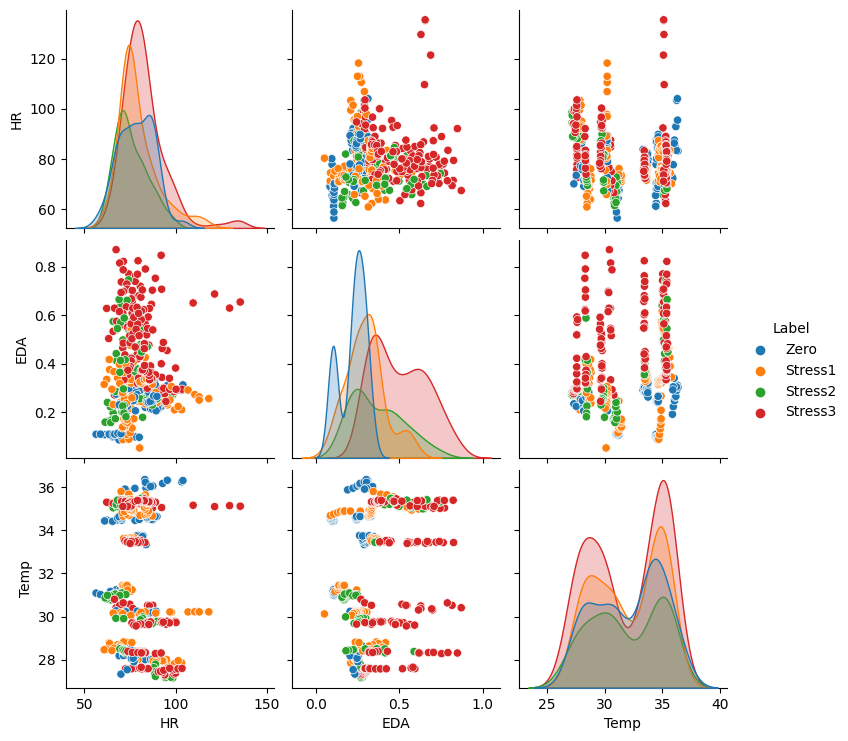

In [40]:
#Now we have ready the data-sets we can start to modelling. We will try a random forest with the complete data-set
sb.pairplot(data=df, hue="Label")

In [41]:
#We apply a hot encoder to get correlation matrix
from sklearn.preprocessing import OneHotEncoder
df_cm = df.copy()
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(df_cm[['Label']])
df_cm[one_hot.categories_[0]] = encoded.toarray()
df_cm.head()

,HR,EDA,Temp,Label,Stress1,Stress2,Stress3,Zero
0,72.987667,0.191197,35.878667,Zero,0.0,0.0,0.0,1.0
1,83.833000,0.222997,35.955333,Zero,0.0,0.0,0.0,1.0
2,87.537000,0.247216,36.054667,Zero,0.0,0.0,0.0,1.0
3,84.711667,0.262016,36.133000,Zero,0.0,0.0,0.0,1.0
4,92.909333,0.265123,36.176000,Zero,0.0,0.0,0.0,1.0


<Axes: >

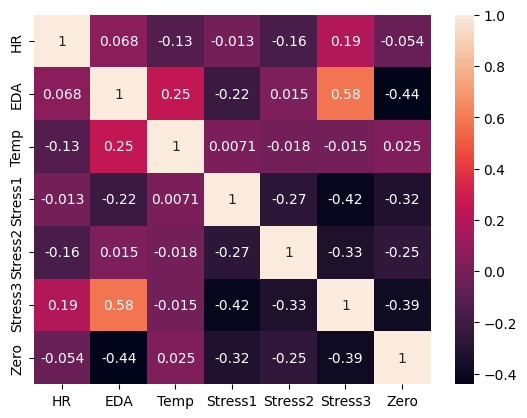

In [42]:
df_cm.drop('Label', axis=1, inplace=True)
sb.heatmap(df_cm.corr(), annot=True) 

From that correlation matrix we can appreciate that EDA correlation with stress3 is higher 0.58 and with Zero -0.44. According to the correlation matrix a new model by groups looks promising.

In [ ]:
# For making graphs
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style

# For modelling
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# For separating data
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X = df[['HR','EDA']]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.125, random_state = 100)


In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state = 100)

In [ ]:
#Fitting models
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)

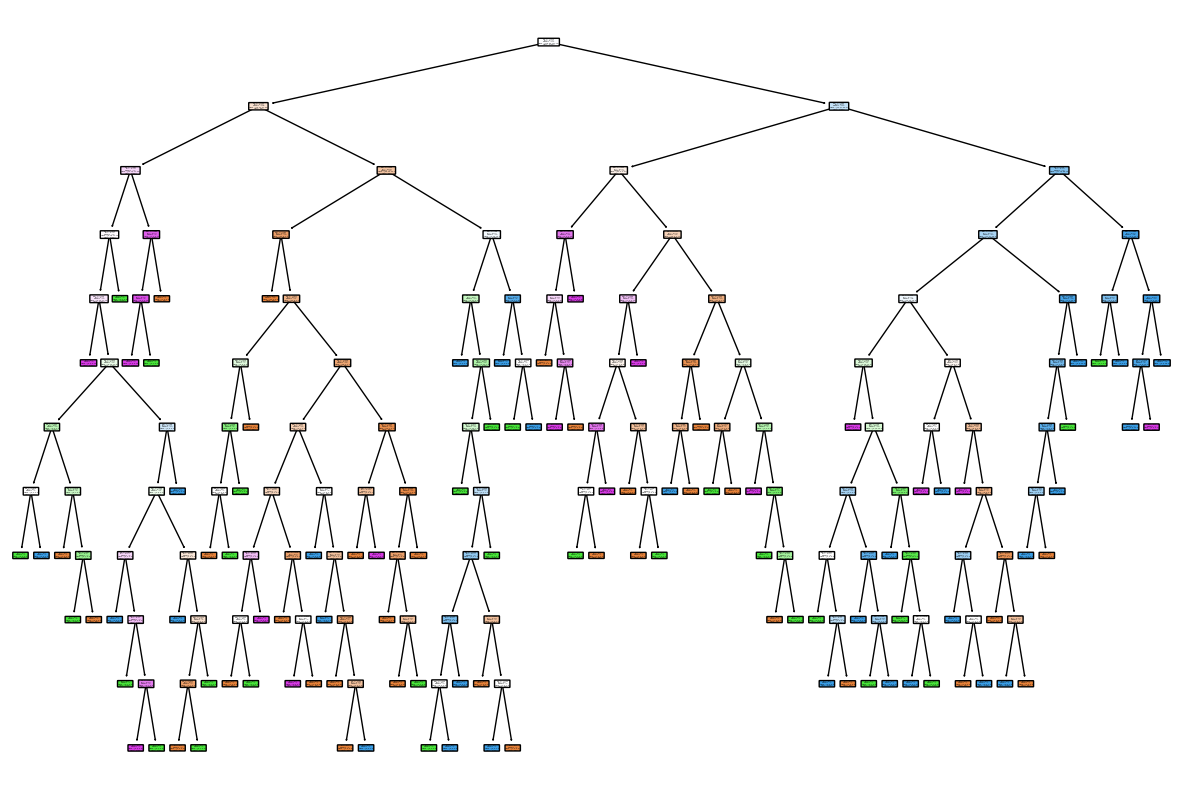

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(forest.estimators_[0], 
          feature_names=X.columns,
          class_names=df['Label'].unique(), 
          filled=True, rounded=True)

plt.show()

In [ ]:
# Error model train
#-------------------------------------------------------------------------------
val_cruz1 = pd.crosstab(y_train, forest.predict(X = X_train))
val_cruz1

col_0,Stress1,Stress2,Stress3,Zero
Label,,,,
Stress1,97,0,0,0
Stress2,0,66,0,0
Stress3,0,0,129,0
Zero,0,0,0,86


In [ ]:
print(len(y_train), len(y_test))

2586 1109


In [ ]:
# Error model test
#-------------------------------------------------------------------------------
val_cruz2 = pd.crosstab(y_test, forest.predict(X = X_test))
val_cruz2

col_0,Stress1,Stress2,Stress3,Zero
Label,,,,
Stress1,7,2,3,2
Stress2,3,5,1,1
Stress3,2,2,14,0
Zero,1,1,1,9


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = forest.predict(X = X_test) 

precision, recall, fscore, support = score(y_test, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.53846154 0.5        0.73684211 0.75      ]
recall: [0.5        0.5        0.77777778 0.75      ]
fscore: [0.51851852 0.5        0.75675676 0.75      ]
support: [14 10 18 12]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.6481481481481481


**GROUP 4**

In [ ]:
df = pd.DataFrame()
df4 = df1[df1['Participant']==GROUP4[0]]
for a in range(1, len(GROUP4)):
  z = df1[df1['Participant']==GROUP4[a]]
  df4 = pd.concat([df4,z], axis =0)
  #print(GROUP4[a])
print(len(df4))

432


In [ ]:
df4 = df4.replace({0: "Zero", 1: "Stress1", 2:"Stress2", 3:"Stress3"})
df4 = df4.drop(['stress'],axis=1)
df4.head()

,Unnamed: 0,Participant,HR,EDA,Temp,Label
660,745.0,14.0,77.219000,0.233921,31.187333,Zero
661,746.0,14.0,73.407333,0.243670,31.308667,Zero
662,747.0,14.0,74.660667,0.236836,31.427333,Zero
663,748.0,14.0,75.790000,0.235277,31.525333,Zero
664,749.0,14.0,77.108667,0.259891,31.596000,Zero


In [ ]:
X = df4[['HR','EDA']]
y = df4['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.125, random_state = 100)

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state = 100)
#Fitting models
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.6851851851851852


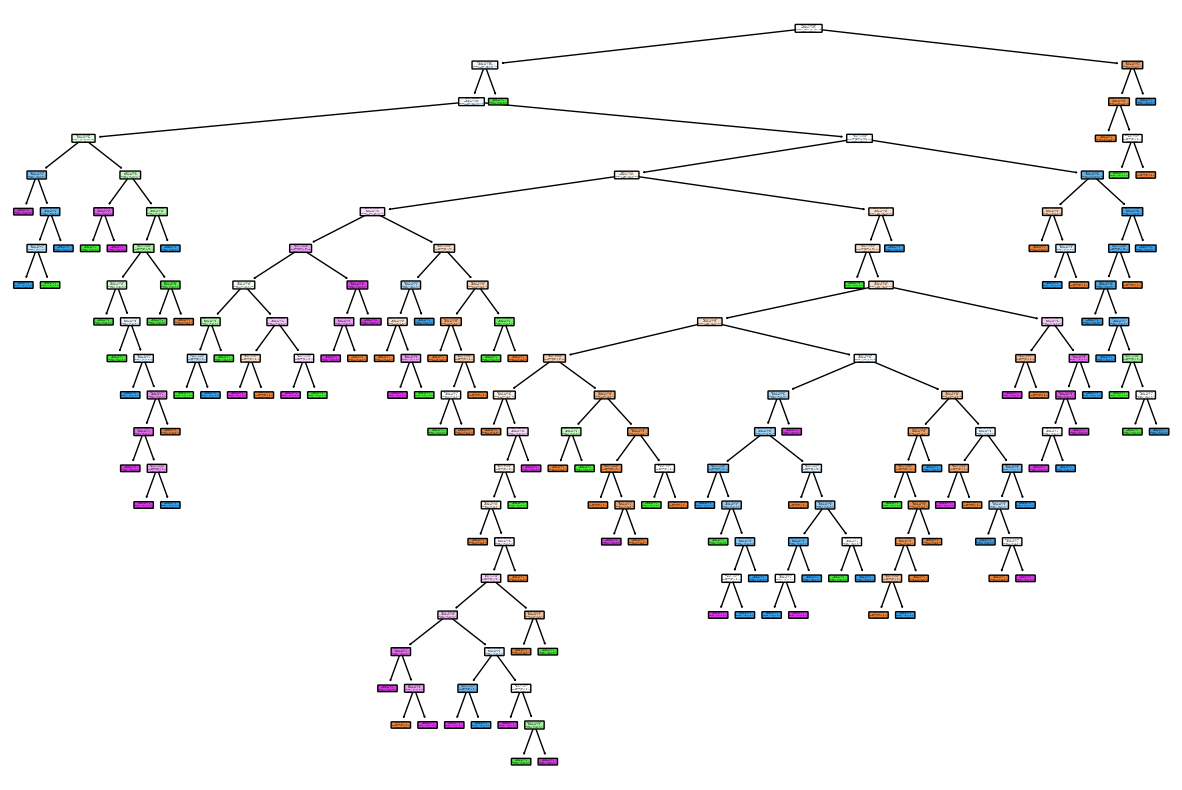

In [ ]:
fig = plt.figure(figsize=(15, 10))
plot_tree(forest.estimators_[0], 
          feature_names=X.columns,
          class_names=df4['Label'].unique(), 
          filled=True, rounded=True)

plt.show()

In [ ]:
val_cruz1 = pd.crosstab(y_train, forest.predict(X = X_train))
val_cruz1

col_0,Stress1,Stress2,Stress3,Zero
Label,,,,
Stress1,95,0,0,0
Stress2,0,65,0,0
Stress3,0,0,126,0
Zero,0,0,0,92


In [ ]:
# Error  test set for the model
#-------------------------------------------------------------------------------
val_cruzdf4 = pd.crosstab(y_test, forest.predict(X = X_test))
val_cruzdf4

col_0,Stress1,Stress2,Stress3,Zero
Label,,,,
Stress1,9,1,4,0
Stress2,0,4,2,3
Stress3,2,0,16,0
Zero,1,2,2,8


**GROUP 3**

In [ ]:
df = pd.DataFrame()
df3 = df1[df1['Participant']==GROUP3[0]]
for a in range(1, len(GROUP3)):
  z = df1[df1['Participant']==GROUP3[a]]
  df3 = pd.concat([df3,z], axis =0)
  #print(GROUP4[a])
print(len(df3))

324


In [ ]:
df3 = df3.replace({0: "Zero", 1: "Stress1", 2:"Stress2", 3:"Stress3"})
df3 = df3.drop(['stress'],axis=1)
df3.head()

,Unnamed: 0,Participant,HR,EDA,Temp,Label
220,244.0,6.0,71.597333,0.182494,28.700667,Zero
221,245.0,6.0,69.981667,0.187790,28.586667,Zero
222,246.0,6.0,71.000667,0.192477,28.532667,Zero
223,247.0,6.0,71.871333,0.195307,28.493333,Zero
224,248.0,6.0,73.638667,0.197571,28.472000,Zero


In [ ]:
X = df3[['HR','EDA']]
y = df3['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.165, random_state = 100)

In [ ]:
len(y_test)

54

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state = 100)
#Fitting models
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7037037037037037


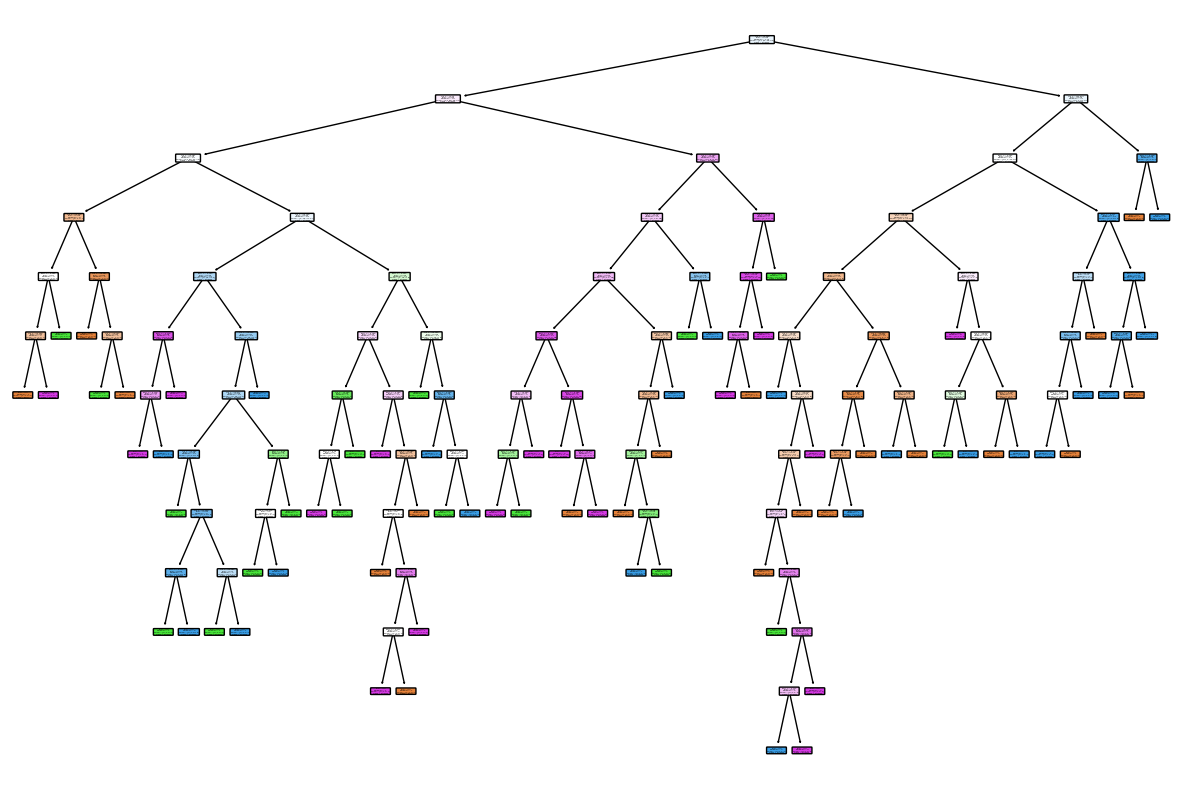

In [ ]:
fig = plt.figure(figsize=(15, 10))
plot_tree(forest.estimators_[0], 
          feature_names=X.columns,
          class_names=df4['Label'].unique(), 
          filled=True, rounded=True)

plt.show()

In [ ]:
# Error  test set for the model
#-------------------------------------------------------------------------------
val_cruzdf3 = pd.crosstab(y_test, forest.predict(X = X_test))
val_cruzdf3

col_0,Stress1,Stress2,Stress3,Zero
Label,,,,
Stress1,9,0,2,2
Stress2,1,3,5,1
Stress3,2,1,12,1
Zero,1,0,0,14


**GROUP 2**

In [ ]:
df = pd.DataFrame()
df2 = df1[df1['Participant']==GROUP2[0]]
for a in range(1, len(GROUP2)):
  z = df1[df1['Participant']==GROUP2[a]]
  df2 = pd.concat([df2,z], axis =0)
  #print(GROUP4[a])
print(len(df2))

270


In [ ]:
df2 = df2.replace({0: "Zero", 1: "Stress1", 2:"Stress2", 3:"Stress3"})
df2 = df2.drop(['stress'],axis=1)
df2.head()

,Unnamed: 0,Participant,HR,EDA,Temp,Label
110,119.0,4.0,85.691667,0.704769,33.786667,Zero
111,120.0,4.0,85.776000,0.751546,33.860000,Zero
112,121.0,4.0,83.303333,0.835009,33.969000,Zero
113,122.0,4.0,83.565000,0.901933,33.985333,Zero
114,123.0,4.0,85.470333,0.926811,33.946667,Zero


In [ ]:
X = df2[['HR','EDA']]
y = df2['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 100)

In [ ]:
len(y_test)

54

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state = 100)
#Fitting models
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.6111111111111112


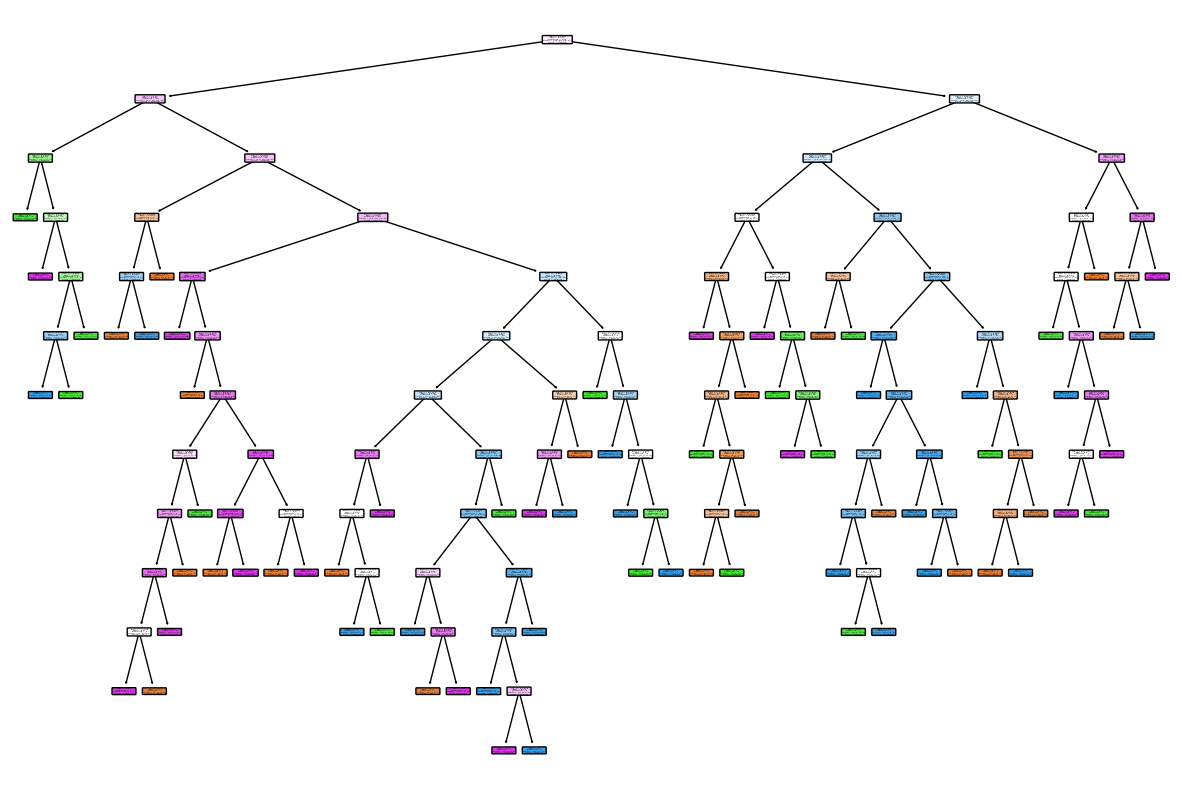

In [ ]:
fig = plt.figure(figsize=(15, 10))
plot_tree(forest.estimators_[0], 
          feature_names=X.columns,
          class_names=df4['Label'].unique(), 
          filled=True, rounded=True)

plt.show()

In [ ]:
# Error  test set for the model
#-------------------------------------------------------------------------------
val_cruzdf2 = pd.crosstab(y_test, forest.predict(X = X_test))
val_cruzdf2

col_0,Stress1,Stress2,Stress3,Zero
Label,,,,
Stress1,5,3,2,2
Stress2,0,8,0,2
Stress3,1,2,9,4
Zero,0,2,3,11
